In [13]:
# Multiclass Classification with the Iris Flowers Dataset
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [14]:
# load dataset
dataframe = pd.read_csv("dati/sonar.csv", header=None)
dataset = dataframe.values
# split into input and output variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
yt = encoder.transform(Y)

In [15]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [16]:
X_train, y_train = X[:160], yt[:160]
X_test, y_test = X[160:], yt[160: ]

In [33]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [17]:
# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(100, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X, yt, epochs = 200, batch_size = 32)

Epoch 1/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4856
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5337
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5337
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5337
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5481
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.5962
Epoch 7/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.6587
Epoch 8/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6731
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6971
Epoch 10/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.6683
Epoch 11/200
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9567
Epoch 85/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9567
Epoch 86/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9519
Epoch 87/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9375
Epoch 88/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9471
Epoch 89/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9567
Epoch 90/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9327
Epoch 91/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9567
Epoch 92/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9615
Epoch 93/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9567
Epoch 94/200
7/7 [===============

7/7 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9952
Epoch 168/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 169/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9952
Epoch 170/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 171/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 1.0000
Epoch 172/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 1.0000
Epoch 173/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 174/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 1.0000
Epoch 175/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 176/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 1.0000
Epoch 177/200
7/7 [=====

In [19]:
history.history

{'loss': [0.6930142045021057,
  0.6889629364013672,
  0.6853703856468201,
  0.6806297898292542,
  0.675308346748352,
  0.6673065423965454,
  0.6568593382835388,
  0.6415411829948425,
  0.6198302507400513,
  0.6019245982170105,
  0.5731691122055054,
  0.5411897897720337,
  0.5171218514442444,
  0.48865827918052673,
  0.46923190355300903,
  0.4539796710014343,
  0.43210551142692566,
  0.4252377152442932,
  0.4122651517391205,
  0.4020012319087982,
  0.39744141697883606,
  0.38656139373779297,
  0.3806226849555969,
  0.37367871403694153,
  0.3692170977592468,
  0.37653085589408875,
  0.36816075444221497,
  0.3726223409175873,
  0.368150532245636,
  0.3666793406009674,
  0.35726216435432434,
  0.34777703881263733,
  0.3422291874885559,
  0.3283998370170593,
  0.321257084608078,
  0.33062249422073364,
  0.3330267667770386,
  0.3392750024795532,
  0.3418928384780884,
  0.3202984631061554,
  0.32594457268714905,
  0.32913434505462646,
  0.34813642501831055,
  0.30501386523246765,
  0.28954291

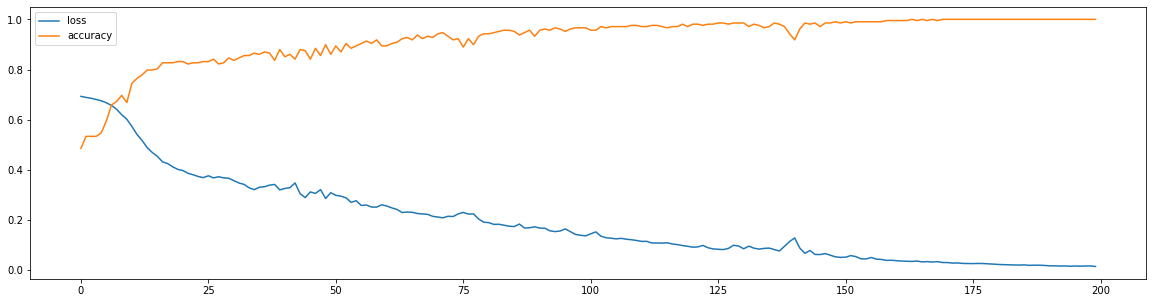

In [20]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend([ 'loss', 'accuracy'], loc = 'upper left')
plt.show()

In [21]:
yhat = model.predict(X_test)

In [27]:
yhat

array([[2.8753281e-04],
       [1.4651609e-05],
       [1.6444921e-04],
       [2.0381093e-02],
       [5.7424451e-05],
       [2.0765841e-02],
       [1.5304685e-03],
       [2.3102194e-02],
       [2.6714146e-02],
       [9.3802214e-03],
       [4.0648818e-02],
       [6.9025159e-04],
       [4.0791631e-03],
       [5.8179915e-02],
       [1.1580958e-04],
       [3.1673908e-04],
       [5.1832199e-04],
       [6.5111071e-02],
       [1.5761858e-01],
       [1.5512109e-04],
       [2.2276636e-05],
       [2.3508728e-06],
       [1.1238214e-05],
       [8.9002369e-06],
       [4.9790364e-05],
       [1.1486139e-05],
       [1.9549007e-06],
       [2.4532006e-05],
       [1.3390183e-04],
       [1.7885864e-03],
       [9.4783306e-04],
       [7.6115131e-03],
       [4.6506524e-04],
       [2.2561044e-02],
       [6.3422322e-04],
       [7.9569407e-05],
       [1.2877584e-04],
       [3.0365586e-04],
       [1.5532970e-04],
       [4.6008825e-04],
       [2.5406480e-04],
       [3.725886

In [28]:
previsioni = []
pi = 0
for i in yhat: 
    
    if i <= 0.5: 
        pi = 0
    else: 
        pi = 1
        
    previsioni.append(pi)

In [30]:
previsioni = np.array(previsioni)

In [32]:
previsioni

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [31]:
metrics.accuracy_score(y_test, previsioni)

1.0